<a href="https://colab.research.google.com/github/maxethan2/CrimeHotSpotPrediction/blob/main/CrimeHotSpotPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing Data

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


data = pd.read_csv("MCI_2014_to_2019.csv")

data['Total'] = 1
data.head()

# drop all NAN
data.dropna()

# drop all dulpicates
data = data.drop_duplicates(subset='event_unique_id',keep='first')

# drop unecessary columns
drop_colmns = ['X', 'Y', 'Index_', 'reporteddate', 'reportedyear', 'reportedmonth', 'reportedday', 'reporteddayofyear',
               'reporteddayofweek', 'reportedhour', 'Hood_ID', 'ucr_code', 'ucr_ext', 'Division', 'occurrencedayofyear']
data_dropped = data.drop(columns=drop_colmns)

data.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId,Total
0,-79.405228,43.656982,7801,GO-20152165447,2015-12-18T03:58:00.000Z,2015-12-18T03:59:00.000Z,Commercial,1430,100,Assault,...,Friday,3,Assault,D14,79,University (79),-79.405228,43.656982,7001,1
1,-79.307907,43.778732,7802,GO-20151417245,2015-08-15T21:45:00.000Z,2015-08-17T22:11:00.000Z,Commercial,1430,100,Assault,...,Saturday,21,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.307907,43.778732,7002,1
2,-79.225029,43.765942,7803,GO-20151421107,2015-08-16T16:00:00.000Z,2015-08-18T14:40:00.000Z,Apartment,2120,200,B&E,...,Sunday,16,Break and Enter,D43,137,Woburn (137),-79.225029,43.765942,7003,1
3,-79.140823,43.778648,7804,GO-20152167714,2015-11-26T13:00:00.000Z,2015-12-18T13:38:00.000Z,Other,2120,200,B&E,...,Thursday,13,Break and Enter,D43,133,Centennial Scarborough (133),-79.140823,43.778648,7004,1
4,-79.288361,43.691235,7805,GO-20152169954,2015-12-18T19:50:00.000Z,2015-12-18T19:55:00.000Z,Commercial,1430,100,Assault,...,Friday,19,Assault,D55,61,Taylor-Massey (61),-79.288361,43.691235,7005,1


## Before Factorization

In [2]:
col_list = ['occurrenceyear',	'occurrencemonth','occurrenceday','occurrencedayofyear','occurrencedayofweek','occurrencehour','Neighbourhood' ,'MCI',	'Division',	'Hood_ID','premisetype', 'Lat', "Long"]


data2 = data[col_list]
dataf = data2.copy()

dataf.head()

,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Neighbourhood,MCI,Division,Hood_ID,premisetype,Lat,Long
0,2015.0,December,18.0,352.0,Friday,3,University (79),Assault,D14,79,Commercial,43.656982,-79.405228
1,2015.0,August,15.0,227.0,Saturday,21,Tam O'Shanter-Sullivan (118),Assault,D42,118,Commercial,43.778732,-79.307907
2,2015.0,August,16.0,228.0,Sunday,16,Woburn (137),Break and Enter,D43,137,Apartment,43.765942,-79.225029
3,2015.0,November,26.0,330.0,Thursday,13,Centennial Scarborough (133),Break and Enter,D43,133,Other,43.778648,-79.140823
4,2015.0,December,18.0,352.0,Friday,19,Taylor-Massey (61),Assault,D55,61,Commercial,43.691235,-79.288361


## After Factorization

In [3]:
# factorize the data
crime_type_var = pd.factorize(data2['MCI'])
dataf['MCI'] = crime_type_var[0]
key_MCI = crime_type_var[1]

premise_var = pd.factorize(data2['premisetype'])
dataf['premisetype'] = premise_var[0]
key_premise = premise_var[1]

year_var = pd.factorize(data2['occurrenceyear'])
dataf['occurrenceyear'] = year_var[0]
key_year = year_var[1]

month_var = pd.factorize(data2['occurrencemonth'])
dataf['occurrencemonth'] = month_var[0]
key_month = month_var[1]

day_var = pd.factorize(data2['occurrenceday'])
dataf['occurenceday'] = day_var[0]
key_day = day_var[1]

dayweek_var = pd.factorize(data2['occurrencedayofweek'])
dataf['occurrencedayofweek'] = dayweek_var[0]
key_day = dayweek_var[1]

division_var = pd.factorize(data2['Division'])
dataf['Division'] = division_var[0]
key_division = division_var[1]

hood_var = pd.factorize(data2['Hood_ID'])
dataf['Hood_ID'] = hood_var[0]
key_hood = hood_var[1]

hour_var = pd.factorize(data2['occurrencehour'])
dataf['occurrencehour'] = hour_var[0]
key_hour = hour_var[1]

dayyear_var = pd.factorize(data2['occurrencedayofyear'])
dataf['occurrencedayofyear'] = dayyear_var[0]
key_dayyear = dayyear_var[1]

neighbourhood_var = pd.factorize(data2['Neighbourhood'])
dataf['Neighbourhood'] = neighbourhood_var[0]
key_neighbourhood = neighbourhood_var[1]

dataf.dropna(inplace=True)
dataf.head()


,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Neighbourhood,MCI,Division,Hood_ID,premisetype,Lat,Long,occurenceday
0,0,0,18.0,0,0,0,0,0,0,0,0,43.656982,-79.405228,0
1,0,1,15.0,1,1,1,1,0,1,1,0,43.778732,-79.307907,1
2,0,1,16.0,2,2,2,2,1,2,2,1,43.765942,-79.225029,2
3,0,2,26.0,3,3,3,3,1,2,3,2,43.778648,-79.140823,3
4,0,0,18.0,0,0,4,4,0,3,4,0,43.691235,-79.288361,0


## Splitting Data

In [4]:
x = dataf.drop(['MCI'],axis=1).values
y = dataf['MCI'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 21)


# KNN
  Knn classifies based off of closest neighbors that are still in the list of availabe neighbors. If closest neighbor is not not in the list, then select the next closest

In [5]:
class Knn:
    def __init__(self, labels, k=5):
        self.k = k
        # labels [0,1,2,3,4]
        # labels are removed as they are used
        self.labels = labels

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
      return np.sqrt(np.sum((x1 - x2)**2))


    def predict(self, X_test):
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)

    def _predict(self, x):
      # get all distances of every point
      distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]

      k_indices = np.argsort(distances)[:self.k]

      k_nearest_labels = [tuple(self.y_train[i]) for i in k_indices]

      # no neighbors close
      if not k_nearest_labels:
          return -1

      counter = 0
      # loop through until nearest lable that has not already been selected before is found
      while True:
          # most common class regardless of what has already been classified
          most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)

          (mc,) = most_common
          # if the most common variable is in the list of available labels then remove it and return the label
          if mc in self.labels:
              self.labels.remove(mc)
              return mc

          # most common was not in the labels list so remove all most common values that cant be used to find the next closest most common
          k_nearest_labels = [label for label in k_nearest_labels if label != mc]

          # if all labels are exhausted
          counter += 1
          if counter >= 5:
              return -1


# KMeans Clustering

In [6]:
# https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670
# learned Kmeans model from this article from Turner Luke
class KMeansClustering:

    def __init__(self, n_clusters=8, max_iterations=300):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations

    def euclidean_distance(self,x1, x2):
      return np.sqrt(np.sum((x1 - x2)**2, axis=1))

    def fit(self, X_train):
        # set initial clusters using k-means++
        self.centroids = [random.choice(X_train)]

        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            distances = np.sum([self.euclidean_distance(centroid, X_train) for centroid in self.centroids], axis=0)
            distances /= np.sum(distances)

            # set remaining clusters based on distances
            new_centroid_idx = np.random.choice(range(len(X_train)), size=1, p=distances)[0]
            self.centroids += [X_train[new_centroid_idx]]

        # adjust clusters until converged or until max iterations
        iteration = 0
        prev_centroids = None

        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iterations:
            # sort datapoints and assign them to nearest cluster center
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                distances = self.euclidean_distance(x, self.centroids)
                centroid_idx = np.argmin(distances)
                sorted_points[centroid_idx].append(x)

            # set current centers to previous and reassign centers as a mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():
                    self.centroids[i] = prev_centroids[i]
            iteration += 1

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            distances = self.euclidean_distance(x, self.centroids)
            centroid_idx = np.argmin(distances)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)

        return centroids, centroid_idxs



# Fitting Kmeans model and KNN

In [7]:
cor = dataf.loc[:, ['Long', 'Lat']]
cor = cor.dropna()
cor = cor.to_numpy()

# fit Kmeans model to all crimes reported
kmean_model = KMeansClustering(n_clusters=5)
kmean_model.fit(cor)

# intialize knn with 5 labels to choose from
knn = Knn([0,1,2,3,4], k=3000)

cor = dataf.loc[:, ['Long', 'Lat']]
cor.dropna()
cor = cor.to_numpy()

y = dataf.loc[:, ['MCI']]
y = y.dropna()
y = y.to_numpy()

# fit Knn to data set
knn.fit(cor, y)

# sorting centers based on how many crimes are commited in their radius
# this is sorted in order to feed them into the KNN in an order in which the highest represented crimes are to be selected for their hotspot
centers_and_sum_crimes = []
radius = 0.06

for center in kmean_model.centroids:
    # Calculate distances from center
    distances = np.linalg.norm(cor - center, axis=1)

    # Count the number of points within the radius
    sum_within_radius = np.sum(distances <= radius)

    print(f"Center {center}: Number of crimes in radius {sum_within_radius}")

    centers_and_sum_crimes.append((center, sum_within_radius))

print(centers_and_sum_crimes)
sorted_centers_sum_crimes = sorted(centers_and_sum_crimes, key=lambda x: x[1], reverse=True)
print(sorted_centers_sum_crimes)


centers_and_labels = []
for center, crime_sum in sorted_centers_sum_crimes:
  centers_and_labels.append((center, knn.predict(center.reshape(1,-1))))

Center [-79.30595373  43.73047198]: Number of crimes in radius 28688
Center [-79.53623633  43.69311248]: Number of crimes in radius 21688
Center [-79.44158327  43.74726865]: Number of crimes in radius 22391
Center [-79.22483486  43.7771615 ]: Number of crimes in radius 21345
Center [-79.39588643  43.66141974]: Number of crimes in radius 58211
[(array([-79.30595373,  43.73047198]), 28688), (array([-79.53623633,  43.69311248]), 21688), (array([-79.44158327,  43.74726865]), 22391), (array([-79.22483486,  43.7771615 ]), 21345), (array([-79.39588643,  43.66141974]), 58211)]
[(array([-79.39588643,  43.66141974]), 58211), (array([-79.30595373,  43.73047198]), 28688), (array([-79.44158327,  43.74726865]), 22391), (array([-79.53623633,  43.69311248]), 21688), (array([-79.22483486,  43.7771615 ]), 21345)]


<ipython-input-8-e429027e1259>:51: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


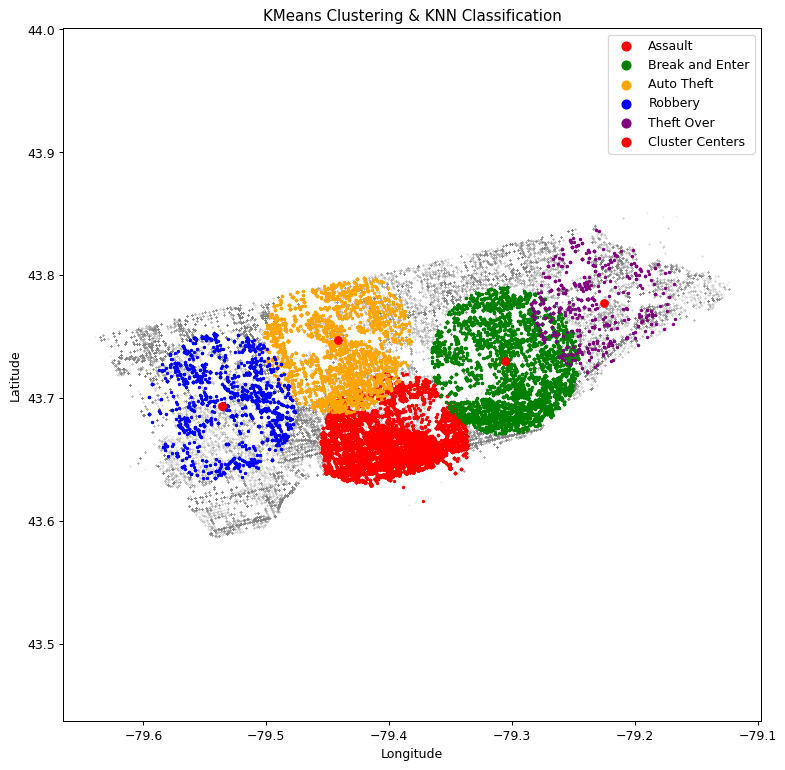

In [8]:
cluster_crime_mapping = {
    0: "Assault",
    1: "Break and Enter",
    2: "Robbery",
    3: "Theft Over",
    4: "Auto Theft"
}

crime_colors = {
    "Assault": "red",
    "Break and Enter": "green",
    "Robbery": "blue",
    "Theft Over": "purple",
    "Auto Theft": "orange"
}


# Plot clusters
plt.figure(figsize=(10, 10), dpi=90)

# plot every crime to vizualize Toronto
plt.scatter(x=cor[:,0], y=cor[:,1], color='grey', s=0.01)

for center, label in centers_and_labels:
    cluster_data = cor[y.flatten() == label]
    crime_type = cluster_crime_mapping[label[0]]
    # plt.scatter(x=cluster_data[:, 0], y=cluster_data[:, 1], label=crime_type, color=crime_colors[crime_type], s=2)

    radius = 0.06

    # Calculate distances from center
    distances = np.linalg.norm(cluster_data - center, axis=1)

    # Plot points within the radius
    within_radius_indices = np.where(distances <= radius)[0]
    within_radius_data = cluster_data[within_radius_indices]

    plt.scatter(x=within_radius_data[:, 0], y=within_radius_data[:, 1], label=crime_type, color=crime_colors[crime_type], s=3)


x_centers = [point[0] for point in kmean_model.centroids]
y_centers = [point[1] for point in kmean_model.centroids]

# Plot cluster centers
plt.scatter(x=x_centers, y=y_centers, color="red", label="Cluster Centers")



# Add legend
legend = plt.legend()
for handle in legend.legendHandles:
    handle.set_sizes([50])

# Show plot
plt.title('KMeans Clustering & KNN Classification')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.axis('equal')
plt.show()

# Density Based Clustering

In [9]:
# https://becominghuman.ai/dbscan-clustering-algorithm-implementation-from-scratch-python-9950af5eed97
#
class Density_Clustering:
    def __init__(self, radius, min_samples):
        self.radius = radius
        self.min_samples = min_samples

    def fit(self, x, n_clusters):
        self.labels = np.zeros(len(x), dtype=int)
        self.visited = set()

        # set core points, border points and noise
        core_points = set()
        border_points = set()
        noise_points = set()

        distance_matrix = np.linalg.norm(x[:, None] - x, axis=2)

        # find core points
        for i, point in enumerate(x):
            # neighbors within defined radius
            neighbors = np.where(distance_matrix[i] <= self.radius)[0]
            if len(neighbors) >= self.min_samples:
                core_points.add(i)

        cluster_id = 0

        # assign labels to core points and expand clusters
        for core_point in core_points:
            # don't revisit point that was already visited
            if core_point in self.visited:
                continue

            # add core point to be visited
            self.visited.add(core_point)
            self.labels[core_point] = cluster_id
            neighbors = set(np.where(distance_matrix[core_point] <= self.radius)[0])
            # remove core point as it is not a neighbor
            neighbors.remove(core_point)

            # loop through all neighbors
            q = deque(neighbors)
            while q:
                neighbor = q.popleft()

                # add neighbors that are within the radius of core point
                if neighbor not in self.visited:
                    self.labels[neighbor] = cluster_id
                    neighbor_neighbors = set(np.where(distance_matrix[neighbor] <= self.radius)[0])
                    if len(neighbor_neighbors) >= self.min_samples:
                        # add new neighbor
                        q.extend(neighbor_neighbors)
                    self.visited.add(neighbor)

            cluster_id += 1

            # end when number of clusters is reached
            if cluster_id >= n_clusters:
                break

        # assign border points
        for i in range(len(x)):
            if i not in core_points:
                neighbors = np.where(distance_matrix[i] <= self.radius)[0]
                for neighbor in neighbors:
                    if neighbor in core_points:
                        border_points.add(i)
                        self.labels[i] = self.labels[neighbor]
                        break

        # set noise points
        noise_points = set(range(len(x))) - core_points - border_points
        for noise_point in noise_points:
            self.labels[noise_point] = -1

        return self.labels


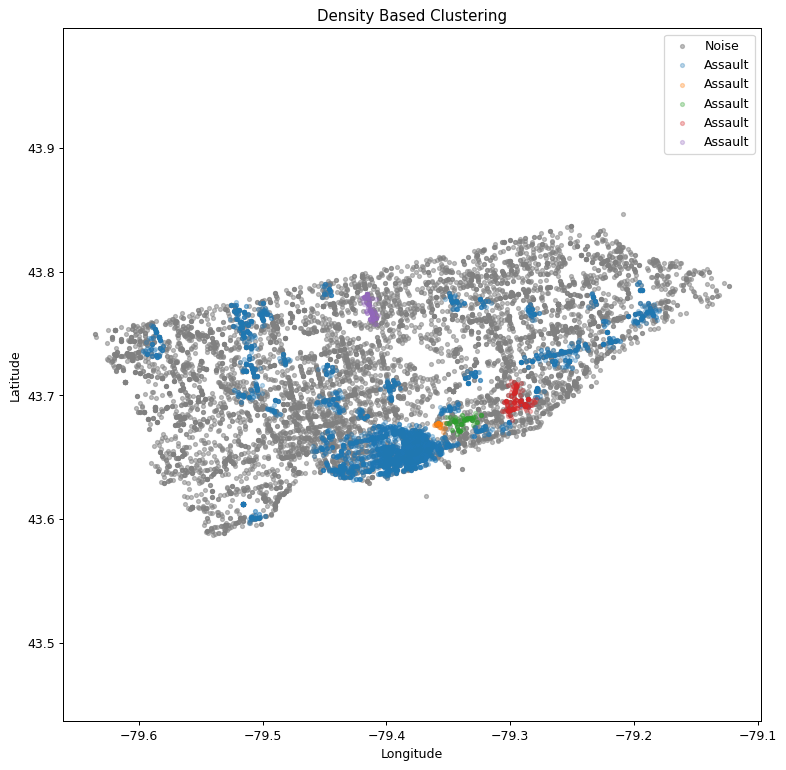

In [12]:
# Convert crime type to numerical labels
crime_type_var = pd.factorize(data['MCI'])
data['MCI'] = crime_type_var[0]

crime_dict = {
    0 : "Assault",
    1 : "Break And Enter",
    2 : "Robbery",
    3 : "Theft Over",
    4 : "Auto Theft"
}

cor = data[['Long', 'Lat', 'MCI']].dropna().to_numpy()

# Take a random subset of the data to avoid ram issues
cor_subset = cor[np.random.choice(cor.shape[0], size=13000, replace=False)]

# fit density clustering model
dbscan = Density_Clustering(radius=0.005, min_samples=20)
labels = dbscan.fit(cor_subset, n_clusters=5)


# Store crime types for each cluster
cluster_crime_types = {}
for label in np.unique(labels):
    if label != -1:  # Ignore noise points
        cluster_mask = (labels == label)
        cluster_data = cor_subset[cluster_mask]
         # get most common crimw in cluster
        crime_types, counts = np.unique(cluster_data[:, 2], return_counts=True)
        most_common_crime_type = crime_types[np.argmax(counts)]
        cluster_crime_types[label] = crime_dict[most_common_crime_type]

plt.figure(figsize=(10, 10), dpi=90)
# Plot noise points separately
noise_mask = (labels == -1)
plt.scatter(cor_subset[noise_mask, 0], cor_subset[noise_mask, 1], c='gray', alpha=0.5, s=10, label='Noise')

# Plot clusters with their associated crime types
for label, crime_type in cluster_crime_types.items():
    plt.scatter(cor_subset[labels == label, 0], cor_subset[labels == label, 1], alpha=0.3, s=10, label=f'{crime_type}')

plt.title('Density Based Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
# plt.xlim(-79.7, -78.99)
plt.legend()
plt.show()
